<a href="https://colab.research.google.com/github/Eskalantysky/Hackaton_mesa_17/blob/main/Hackat%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hackatón 2023
# Integrantes
* María Lucía Orozco
* Natalia Florez Martinez
* Sebastián Orozco
* Gabriel Lopera
* Andrés Escalante

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import sklearn as skl
import scipy as sp
from scipy.stats import norm, skew
import seaborn as sns

In [2]:
!git clone <https://github.com/Eskalantysky/Hackaton_mesa_17.git>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/Eskalantysky/Hackaton_mesa_17.git>'


In [3]:
data=pd.read_csv("Data.csv")
data

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,"1,048532523",2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,"3,943369595",4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,"1,794683947",4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,"2,564835799",4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,"5,486409606",4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,"2,565230012",4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,"1,837406215",4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,"1,015388194",4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,"1,582987998",4,10,242,0,0,NO,SI,NO


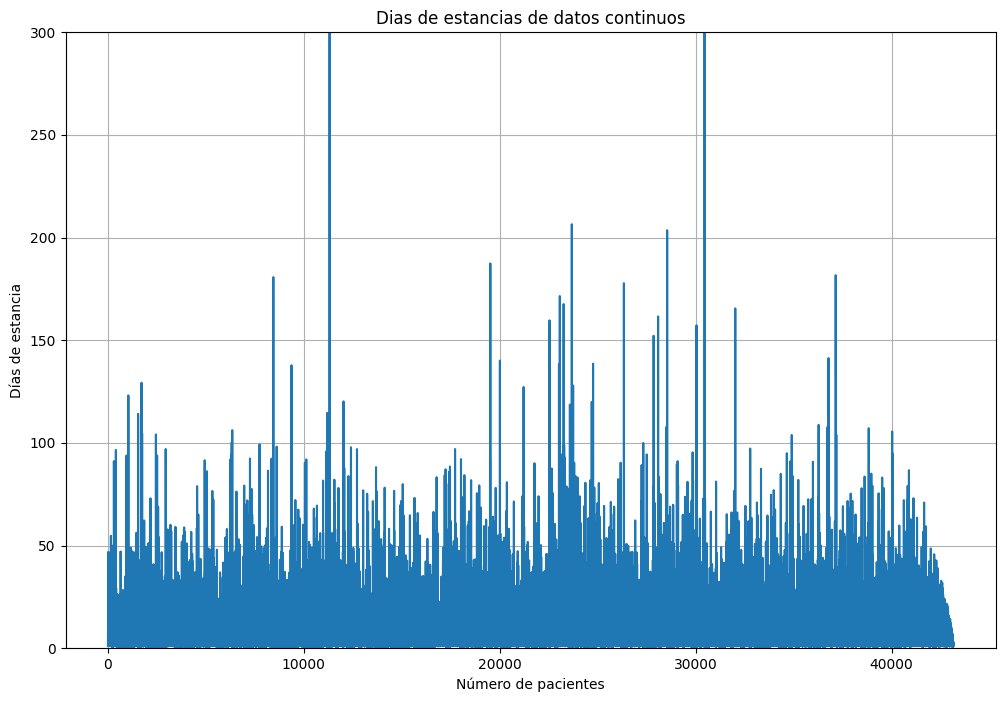

In [4]:
Days = data['DiasEstanciaClinica_exacto']
data['DiasEstanciaClinica_exacto'] = data['DiasEstanciaClinica_exacto'].str.replace(',', '.')
Dias_exacto = [float(elemento) for elemento in data['DiasEstanciaClinica_exacto']]

plt.figure(figsize=(12,8))
plt.plot(Dias_exacto)
plt.xlabel('Número de pacientes')
plt.ylabel('Días de estancia')
plt.ylim(0,300)
plt.title('Dias de estancias de datos continuos')
plt.grid()
plt.show()

<ipython-input-5-aef3914a2847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm',annot = True)


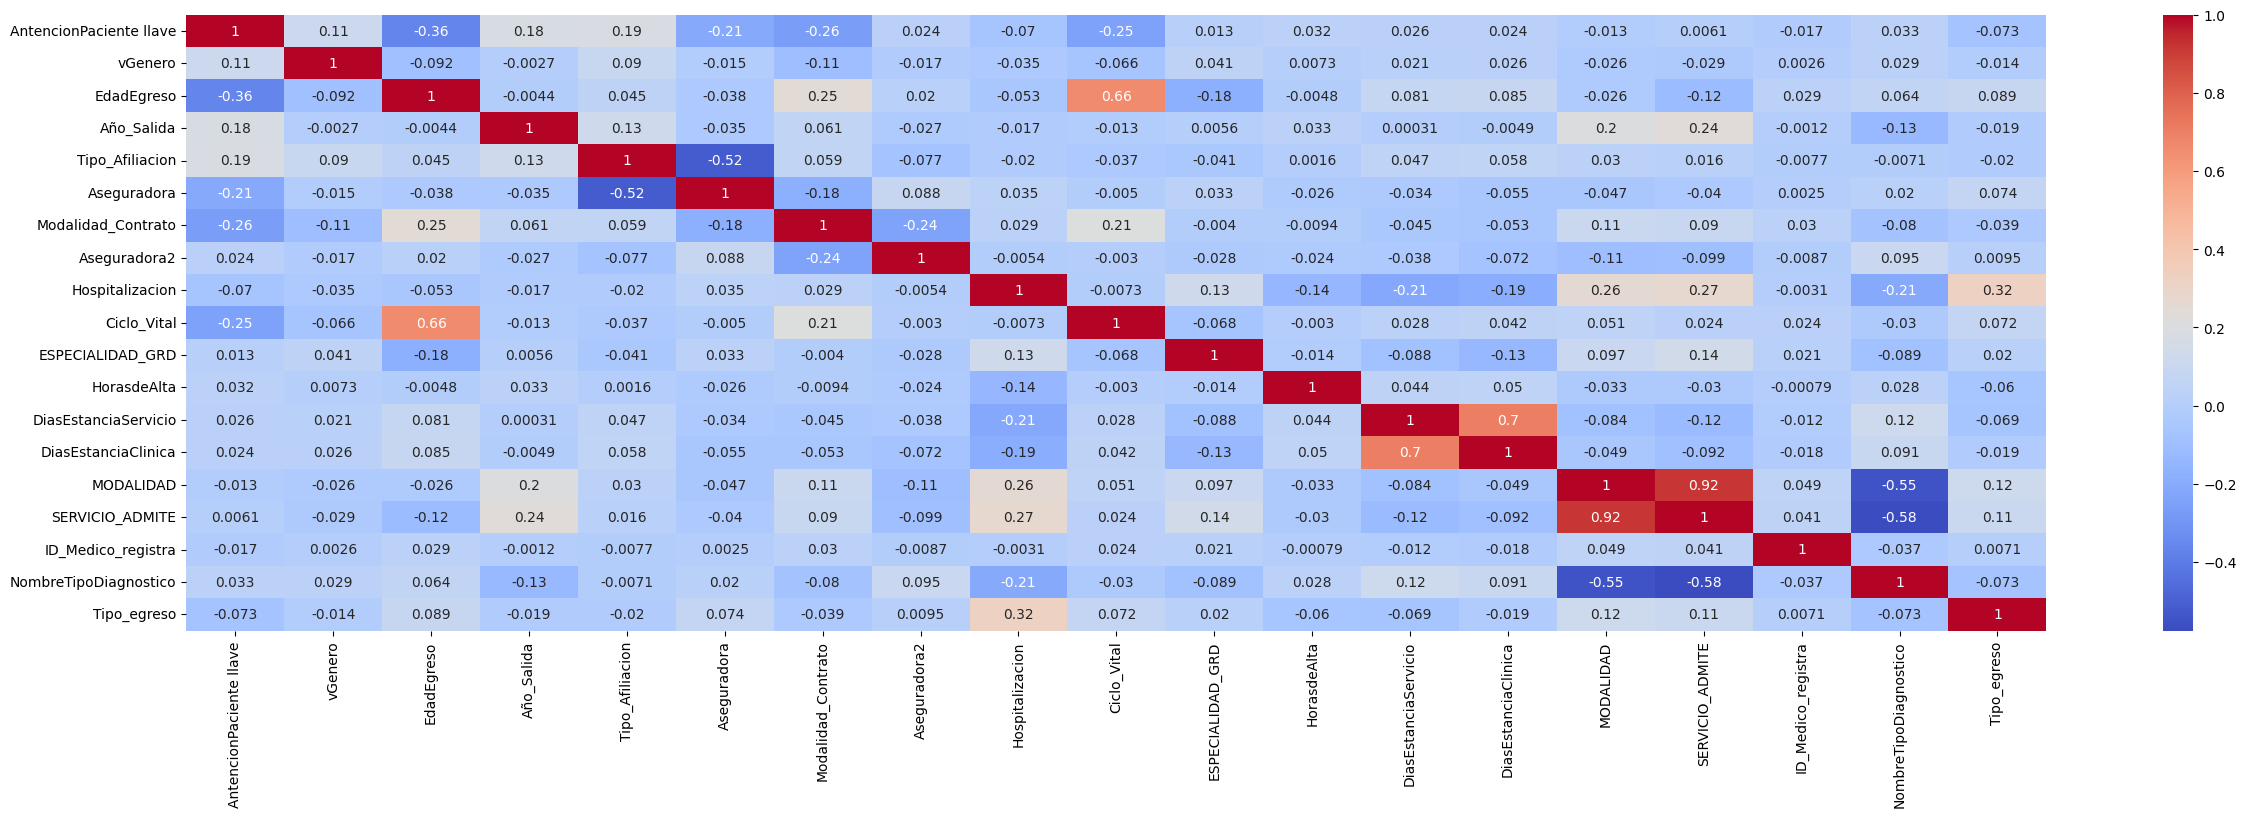

In [5]:
plt.figure(figsize=(30,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot = True)
plt.show()

In [6]:
data

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048532523,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943369595,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794683947,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564835799,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486409606,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230012,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406215,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388194,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582987998,4,10,242,0,0,NO,SI,NO


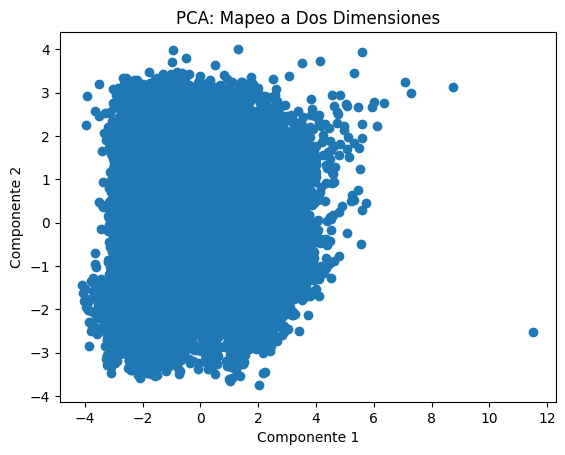

In [7]:
data = data.select_dtypes(include=['number'])  # Elimina todas las columnas que no son numéricas data

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)  # Aplica PCA a los datos estandarizados
principal_components.shape
df_pca = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA: Mapeo a Dos Dimensiones')
plt.show()


In [8]:
## Días de estancia de servicio vs nombre tipo diagnósctico

### Etiquetado
DaysCli = data['DiasEstanciaClinica']
label=np.zeros(len(data['DiasEstanciaClinica']))
label[DaysCli <= 30]=0
label[np.logical_and(DaysCli > 31 ,DaysCli <= 90)] = 1
label[DaysCli > 91]=2
data["Label"]=label

data[10:40]

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,Ciclo_Vital,ESPECIALIDAD_GRD,HorasdeAlta,DiasEstanciaServicio,DiasEstanciaClinica,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Label
10,11,0,64,2022,1,69,1,43,3,5,18,72,8,8,2,4,294,1,0,0.0
11,12,0,64,2022,1,69,1,43,3,5,18,24,3,3,2,4,294,1,0,0.0
12,13,0,64,2022,1,69,1,43,6,5,21,192,3,4,4,8,237,1,2,0.0
13,14,1,76,2023,2,48,1,32,6,5,34,48,2,2,4,8,320,1,2,0.0
14,15,0,93,2022,2,48,1,32,7,5,23,0,4,4,4,8,101,1,0,0.0
15,16,0,78,2022,2,48,2,32,3,5,23,72,4,7,4,8,10,0,0,0.0
16,17,0,79,2023,2,48,2,43,3,5,23,48,2,2,4,8,271,1,0,0.0
17,18,0,79,2023,2,48,2,43,3,5,23,72,3,5,4,8,207,1,1,0.0
18,19,0,59,2022,2,48,1,43,3,5,26,0,11,11,2,4,231,1,0,0.0
19,20,0,90,2022,2,48,1,43,3,5,30,48,3,8,2,4,155,1,0,0.0


<ipython-input-9-467ab6cf2135>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 3))


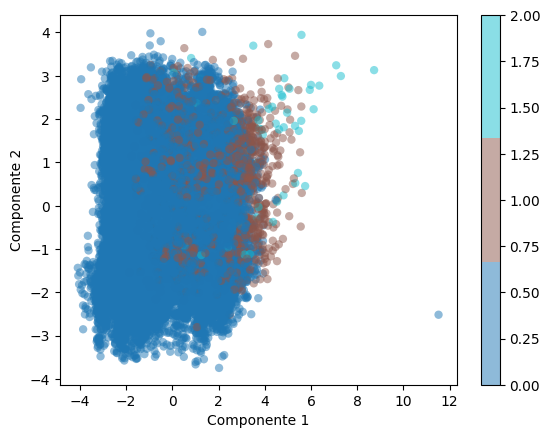

In [9]:
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'],
            c=data['Label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Días de estancia')

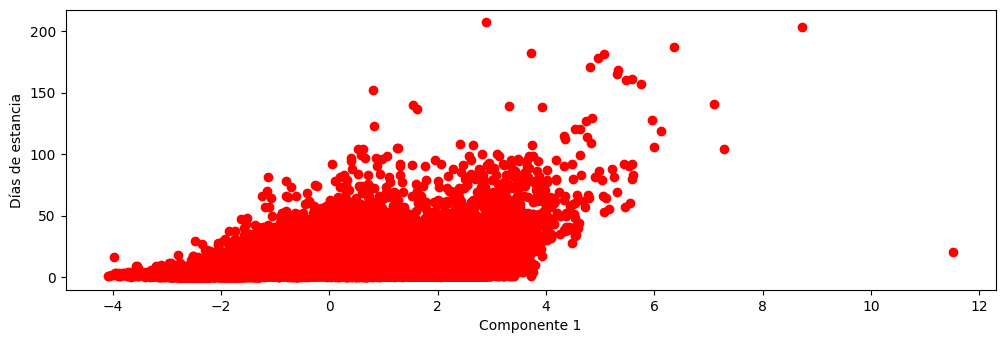

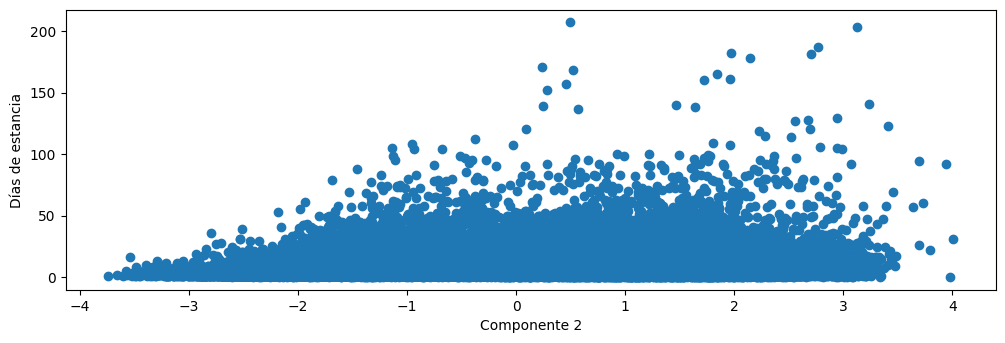

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df_pca['Componente 1'],data['DiasEstanciaClinica'],"or")
plt.xlabel('Componente 1')
plt.ylabel('Días de estancia')

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
plt.plot(df_pca['Componente 2'],data['DiasEstanciaClinica'],"o")
plt.xlabel('Componente 2')
plt.ylabel('Días de estancia')

In [11]:
data_original=pd.read_csv("Data.csv")

data_original['DiasEstanciaClinica_exacto']  #etiqueta
valores_nulos = data_original['DiasEstanciaClinica_exacto'].isnull()  # También puedes usar df.isna()

# Contar los valores nulos en cada columna
conteo_nulos_por_columna = valores_nulos.sum()
print(conteo_nulos_por_columna)
data_original['DiasEstanciaClinica_exacto'] = data_original['DiasEstanciaClinica_exacto'].str.replace(',', '.')
# Convertir la columna en tipo de dato 'float' si es necesario
data_original['DiasEstanciaClinica_exacto'] = data_original['DiasEstanciaClinica_exacto'].astype(float)
print(data_original['DiasEstanciaClinica_exacto'].dtype)

0
float64


In [12]:
data = data_original.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(data.drop('DiasEstanciaClinica_exacto', axis=1), data['DiasEstanciaClinica_exacto'], test_size=0.3, random_state=101)

## Regresión Lineal

In [13]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [14]:
lm = LinearRegression(positive=True)
lm.fit(X_train,y_train)

LinearRegression(positive=True)

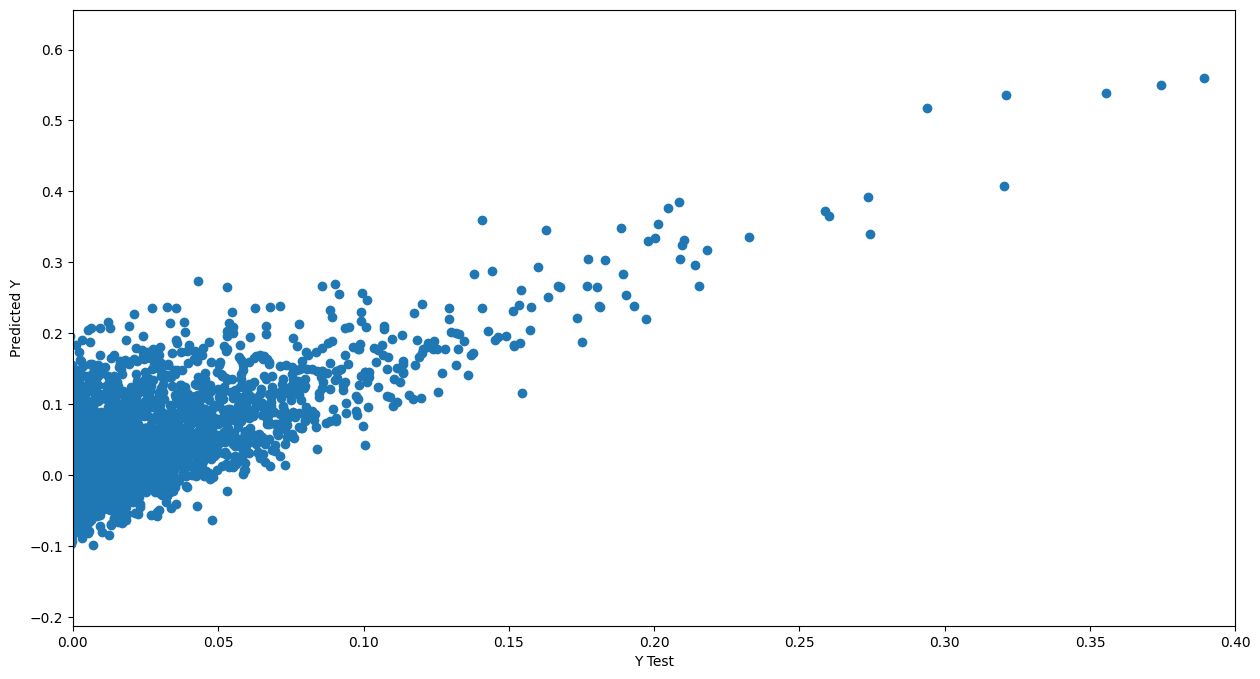

In [15]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,0.4)
plt.show()

In [16]:
max(y_test)
j =  np.argmax(y_test)
y_test[j] = 0
y_test[j]

array([0.])

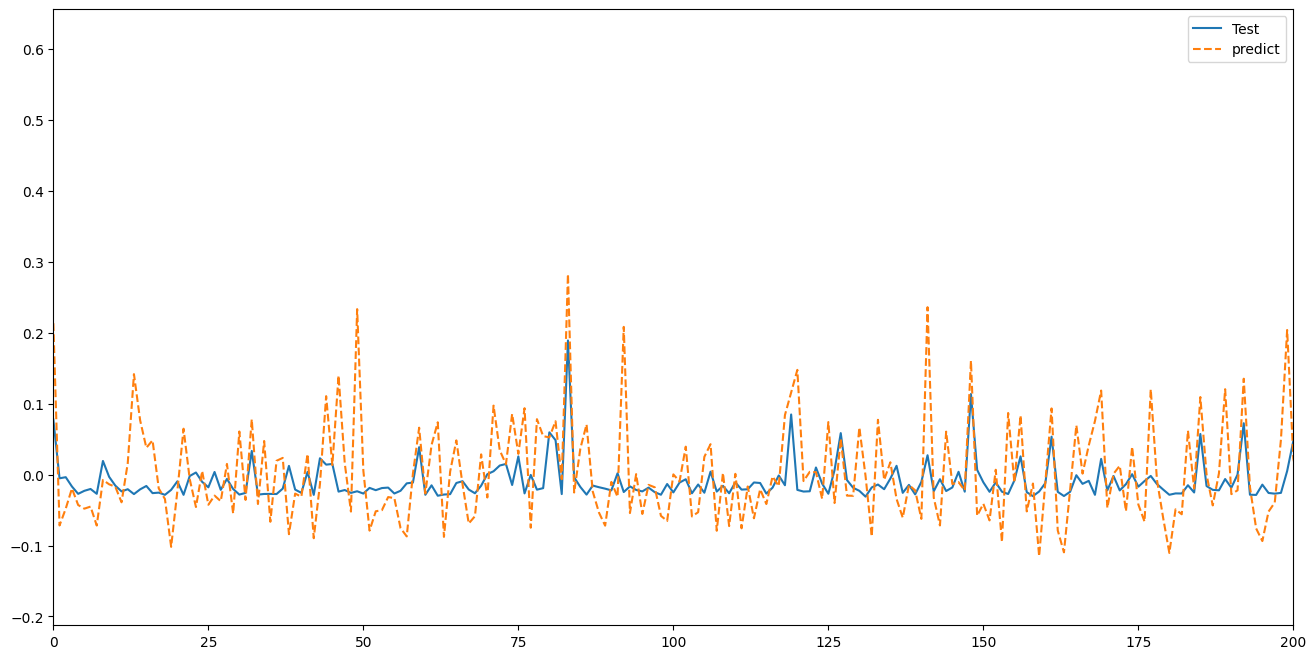

In [17]:
plt.figure(figsize=(16,8))
#y_test = sc_y.inverse_transform(y_test)
#predictions=sc_y.inverse_transform(predictions)
plt.plot(y_test,label ='Test')
plt.plot(predictions, '--',label = 'predict')
plt.legend()
plt.xlim(0,200)
plt.show()

Dias:

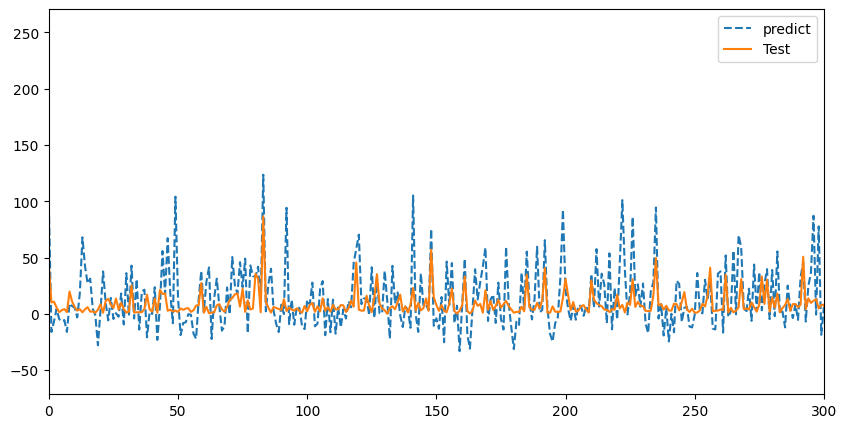

In [18]:
y_test_original = sc_y.inverse_transform(y_test)
predictions_original = sc_y.inverse_transform(predictions)

plt.figure(figsize=(10,5))
plt.plot(predictions_original, '--',label = 'predict')
plt.plot(y_test_original,label ='Test')
plt.legend()
plt.xlim(0,300)
plt.show()

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test_original, predictions_original))
print('MSE:', metrics.mean_squared_error(y_test_original, predictions_original))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_original, predictions_original)))

MAE: 16.185356132523417
MSE: 459.2457960167044
RMSE: 21.430020905652526


## Gradient Boosting Regression

In [20]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'absolute_error'}
clf = ensemble.GradientBoostingRegressor(**params)

In [21]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, loss='absolute_error',
                          max_depth=4)

In [22]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

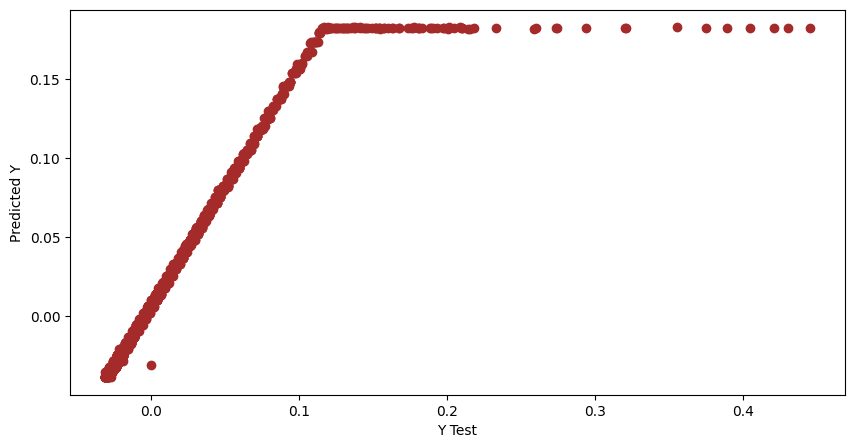

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

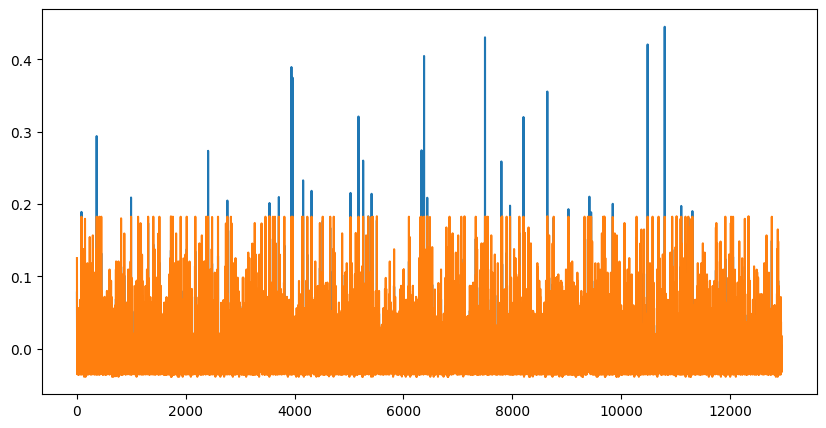

In [24]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.0075976164680087175
MSE: 0.00016817989405659172
RMSE: 0.01296841910398456


En días.

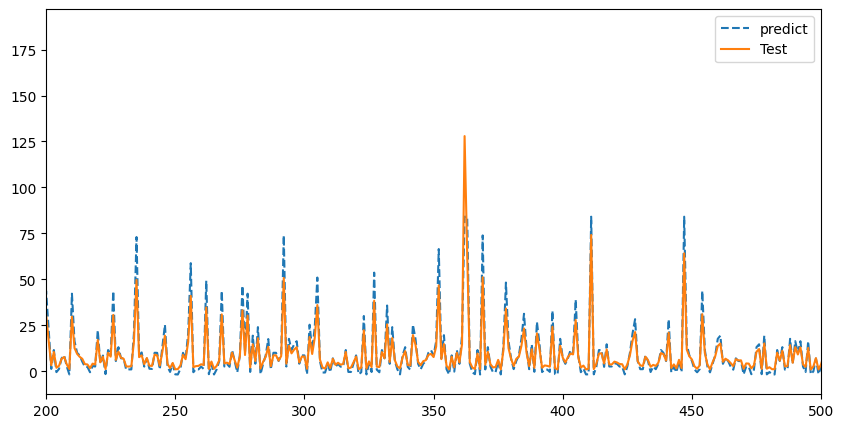

In [26]:
clf_pred_original = sc_y.inverse_transform(clf_pred)

plt.figure(figsize=(10,5))
plt.plot(clf_pred_original, '--',label = 'predict')
plt.plot(y_test_original,label ='Test')
plt.legend()
plt.xlim(200,500)
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test_original, clf_pred_original))
print('MSE:', metrics.mean_squared_error(y_test_original, clf_pred_original))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_original, clf_pred_original)))
print('R2 score:', metrics.r2_score(y_test_original, clf_pred_original))

MAE: 2.990870299103261
MSE: 26.06240575632734
RMSE: 5.105135233892177
R2 score: 0.7810689654733145


## Decision Tree Regression

In [28]:
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [29]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('R2 score:', metrics.r2_score(y_test, dtr_pred))

MAE: 0.008093323385219146
MSE: 0.00022113265786431364
RMSE: 0.01487052984477398
R2 score: 0.7121368054995973


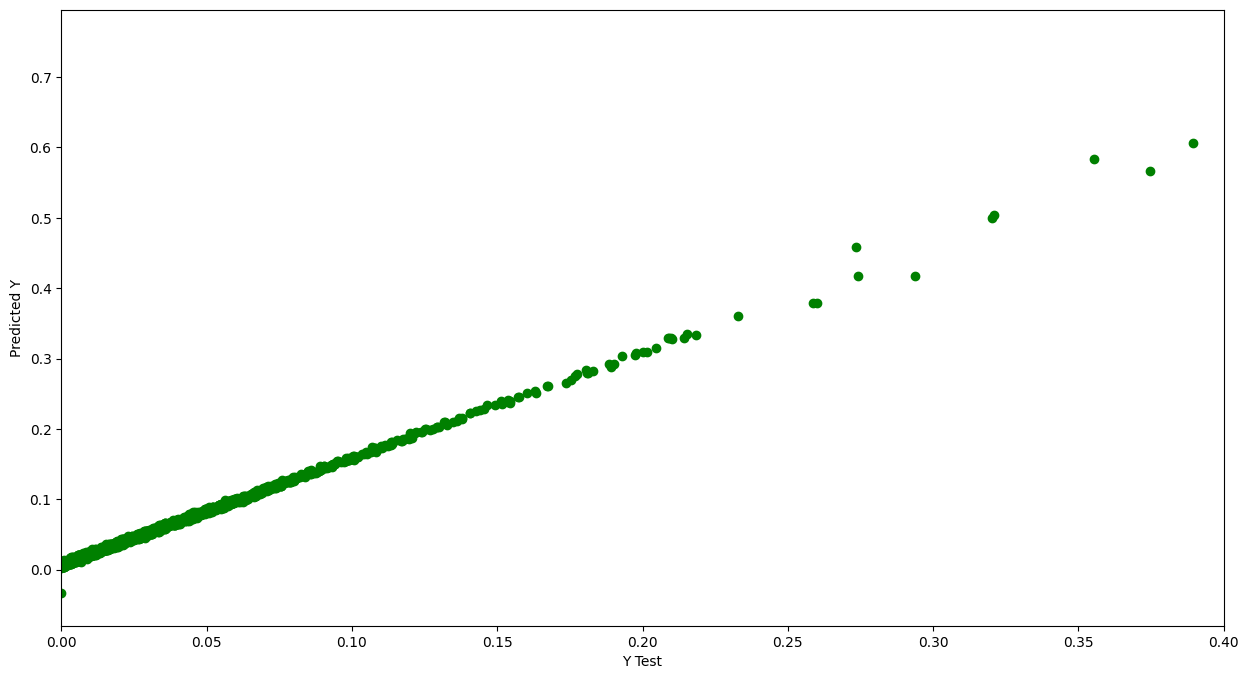

In [31]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.xlim(0,0.4)
plt.ylabel('Predicted Y')
plt.show()

## Support Vector Machine Regression

In [32]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [33]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [34]:
ytest_pred_original = sc_y.inverse_transform(y_test)
svr_red_pred_original = sc_y.inverse_transform(svr_pred)

In [35]:
print('MAE:', metrics.mean_absolute_error(ytest_pred_original, svr_red_pred_original))
print('MSE:', metrics.mean_squared_error(ytest_pred_original, svr_red_pred_original))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest_pred_original, svr_red_pred_original)))
print('R2 score:', metrics.r2_score(ytest_pred_original, svr_red_pred_original))

MAE: 19.591249475427098
MSE: 460.60767749597164
RMSE: 21.461772468646938
R2 score: -2.869225131707002


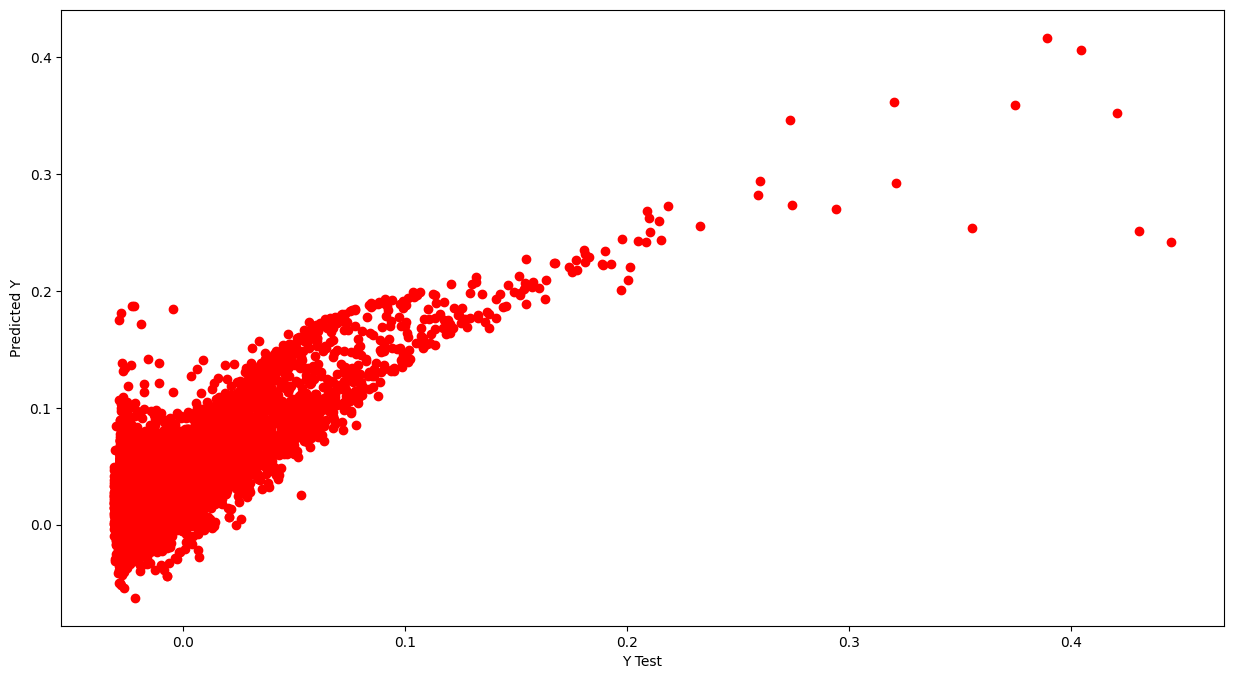

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

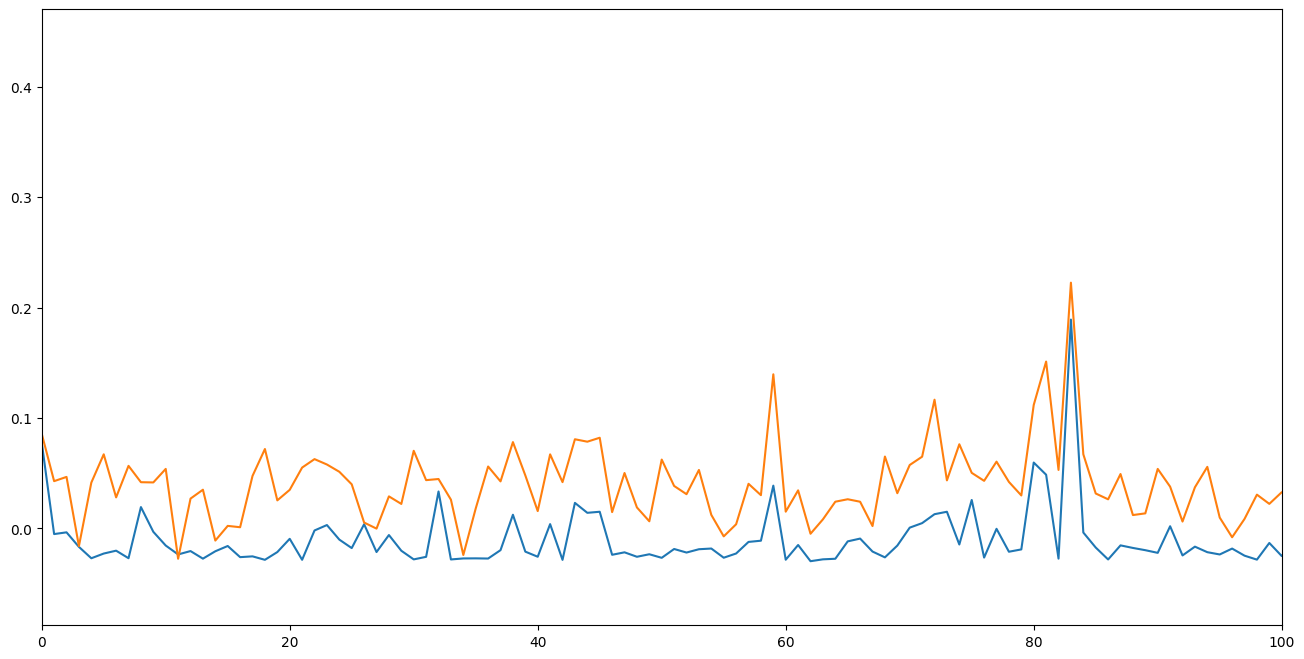

In [37]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.xlim(0,100)
plt.plot(svr_pred, label = 'predict')
plt.show()

## Random Forest Regression

Normalizado

In [38]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

<ipython-input-38-664918805d82>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [39]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('R2 score:', metrics.r2_score(y_test, rfr_pred))

MAE: 0.010683659068207856
MSE: 0.0932429396157649
RMSE: 0.30535706904501964
R2 score: -120.38058087680528


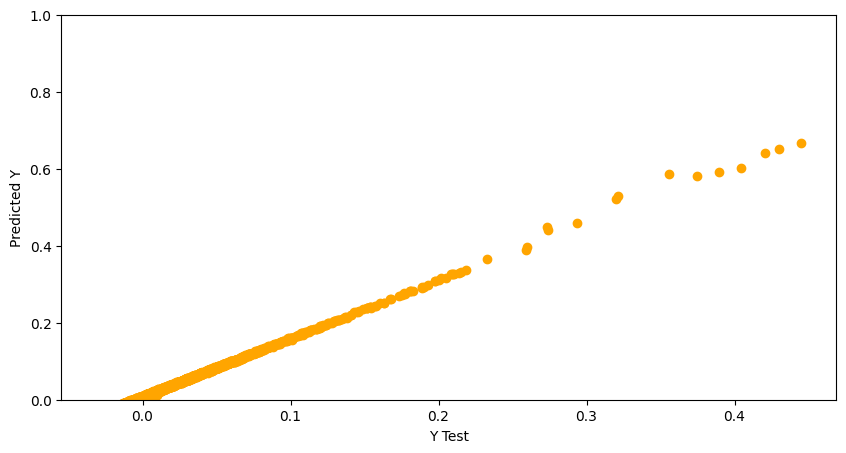

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.ylim(0,1)
plt.show()

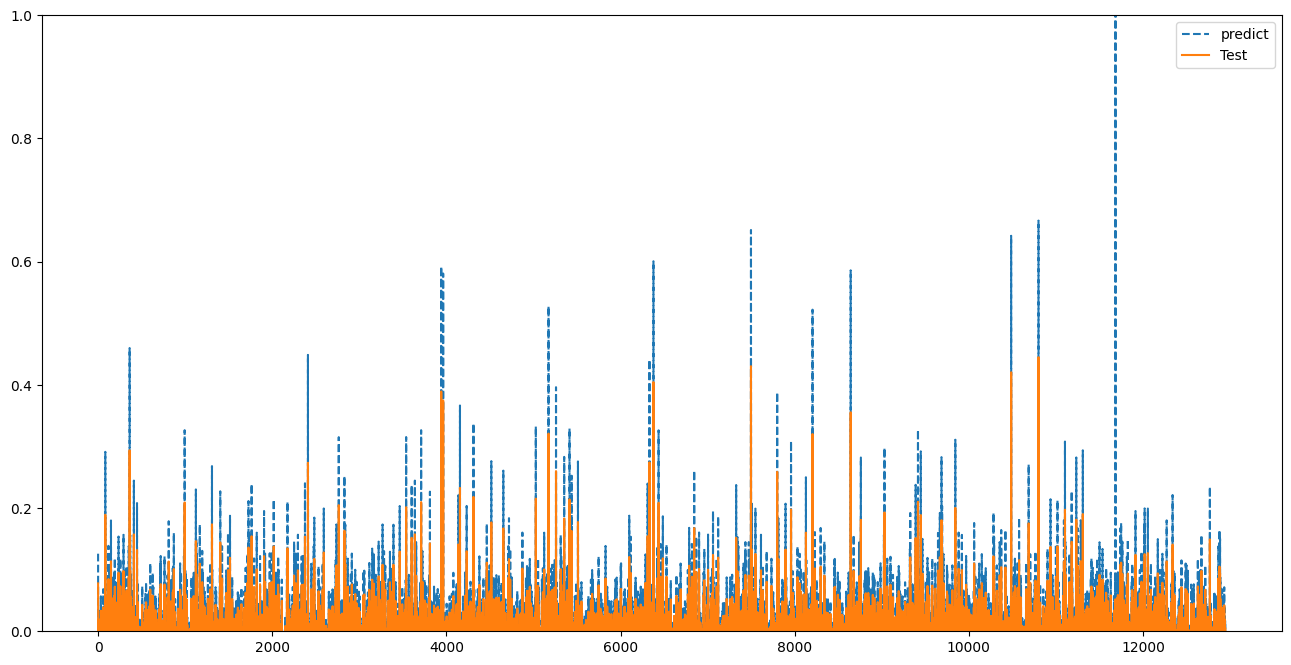

In [42]:
plt.figure(figsize=(16,8))
plt.plot(rfr_pred,'--', label = 'predict')
plt.plot(y_test,label ='Test')
plt.ylim(0,1)
plt.legend()
plt.show()

En días.

In [43]:
rfr_pred_original=sc_y.inverse_transform(rfr_pred)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test_original, rfr_pred_original))
print('MSE:', metrics.mean_squared_error(y_test_original, rfr_pred_original))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_original,rfr_pred_original)))
print('R2 score:', metrics.r2_score(y_test_original, rfr_pred_original))

MAE: 4.2057188234487
MSE: 14449.618605188707
RMSE: 120.20656639796641
R2 score: -120.38058087680527


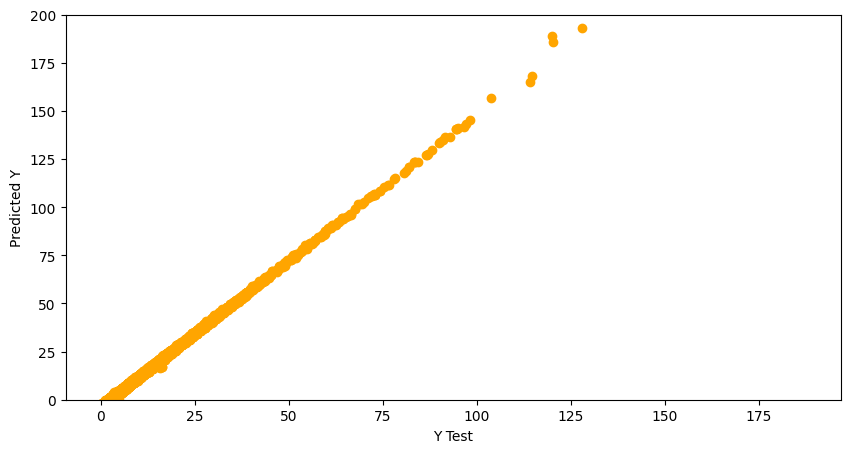

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(y_test_original,rfr_pred_original, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.ylim(0,200)
plt.show()

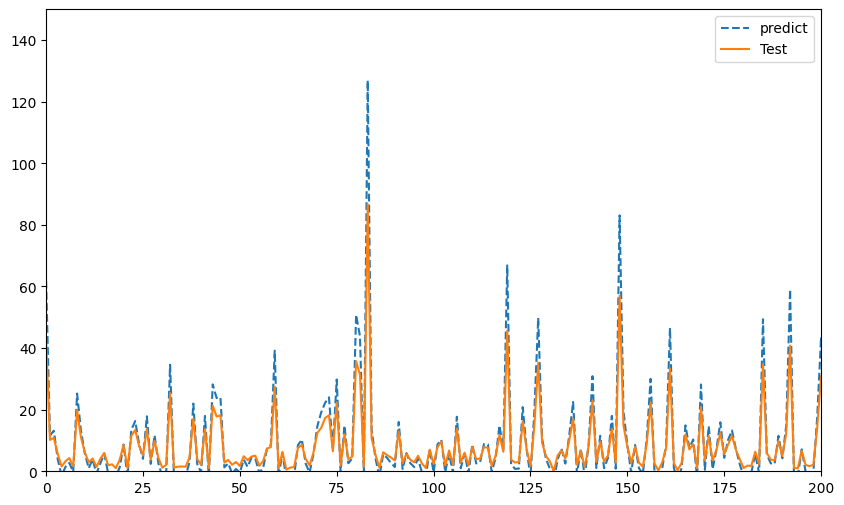

In [46]:
plt.figure(figsize=(10,6))
plt.plot(rfr_pred_original,'--', label = 'predict')
plt.plot(y_test_original,label ='Test')
plt.ylim(0,150)
plt.xlim (0,200)
plt.legend()
plt.show()

## LightGBM

In [47]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [48]:
model_lgb.fit(X_train,y_train)

lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)
lgb_pred_original = sc_y.inverse_transform(lgb_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [49]:
print('MAE:', metrics.mean_absolute_error(ytest_pred_original, lgb_pred_original))
print('MSE:', metrics.mean_squared_error(ytest_pred_original, lgb_pred_original))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest_pred_original, lgb_pred_original)))
print('R2 score:', metrics.r2_score(ytest_pred_original, lgb_pred_original))

MAE: 49.81242128287114
MSE: 27052.03633082921
RMSE: 164.47503254545722
R2 score: -226.24419055305626


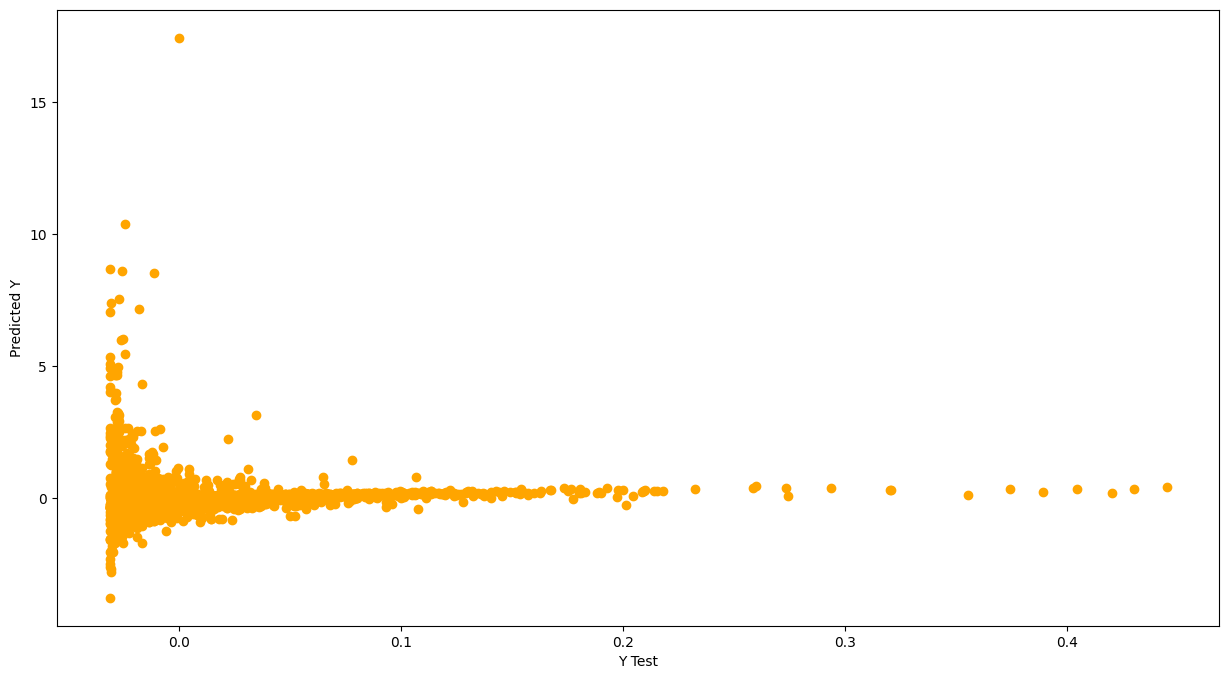

In [50]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

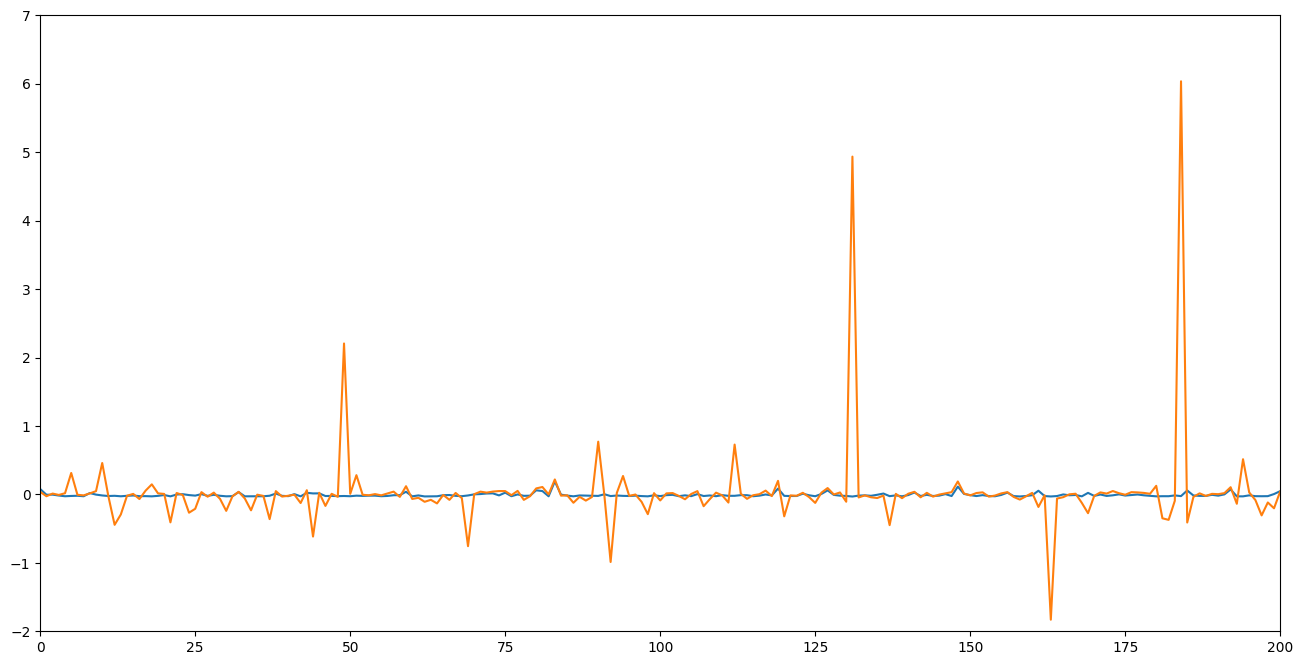

In [51]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.xlim(0,200)
plt.plot(lgb_pred, label = 'predict')
plt.ylim(-2,7)
plt.show()

### Conclusiones:
Gradient Boosting fue el modelo que tuvo el mejor desempeño, con la menor MAE de aproximadamente 3 días. Esto sugiere que este modelo pudo predecir los valores más cercanos a los valores reales de manera más precisa en comparación con otros modelos. No obstante, se pudo observar que por efectos de sobre entrenamiento de los datos para las prediciones de dias de esntancia mayores a 80 dias no predice bien el valor exacto ni cercano debido a que no predice mayores valores que estos.

Le sigue Regresión de Árbol que obtuvo una MAE de 3.78 días, con un rendimiento bastante bueno pero ligeramente inferior al modelo de Gradient Boosting.

Random Forest tuvo un rendimiento un poco peor con una MAE de 4 días en comparación con los dos modelos anteriores.

Regresión Lineal mostró una MAE significativamente más alta de 14 días, lo que sugiere que este modelo no se ajusta bien a los datos.

Support Vector Machine Regression (SVM) obtuvo una MAE aún mayor de 19 días y Light GBM tuvo el peor desempeño con una MAE de 49.8 días,este modelo tuvo dificultades para hacer predicciones precisas.

En general, los modelos como Gradient Boosting y Random Forest, parecen haber funcionado mejor para este problema en particular. Sin embargo, es importante recordar que el rendimiento de un modelo puede depender de la calidad de los datos, la elección de características y otros parámetros.